<h1 align = 'center'> Homework 11: Data Competition </h1>
<h3 align = 'center'> By: Josh Jaeger and Max Butler </h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing

<h3> Data Preprocessing and Feature Reduction </h3>

In [2]:
trainingDF = pd.read_csv(r"../Competition/train_data.csv")

In [3]:
trainingDF.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
733,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.158,0.000,0.000,0.079,0.079,1.719,15,98,0
1779,0.0,0.0,0.29,0.0,0.59,0.29,0.29,0.00,0.29,1.78,...,0.0,0.137,0.000,0.045,0.045,0.000,12.200,163,488,1
125,0.0,0.0,0.34,0.0,0.34,0.00,0.00,0.00,0.00,0.00,...,0.0,0.232,0.000,0.406,0.000,0.000,1.425,6,77,0
3156,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.267,0.066,0.000,0.000,0.000,17.952,200,377,0
423,0.0,0.0,0.00,0.0,0.00,1.29,0.00,0.64,0.00,0.00,...,0.0,0.000,0.000,1.160,0.116,0.000,1.800,12,63,1


In [4]:
trainingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [5]:
trainingDF['class'].value_counts()

0    1951
1    1269
Name: class, dtype: int64

In [6]:
train_X = trainingDF.drop(columns=['class'])
train_y = trainingDF['class']

In [7]:
rf = RandomForestClassifier(n_estimators=5, max_features=10,random_state=1984)

In [8]:
rf.fit(train_X,train_y)

RandomForestClassifier(max_features=10, n_estimators=5, random_state=1984)

In [9]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = train_X.columns ,
                                   columns = ['importance'])
feature_importances = feature_importances.sort_values('importance'  , ascending=False)

feature_importances

,importance
word_freq_hp,0.112480
word_freq_remove,0.104472
char_freq_$,0.092759
capital_run_length_longest,0.075843
char_freq_!,0.075690
word_freq_free,0.075457
word_freq_our,0.063328
capital_run_length_average,0.063076
word_freq_your,0.051859
capital_run_length_total,0.026204


<AxesSubplot:title={'center':'Feature Importance of Spam Email'}>

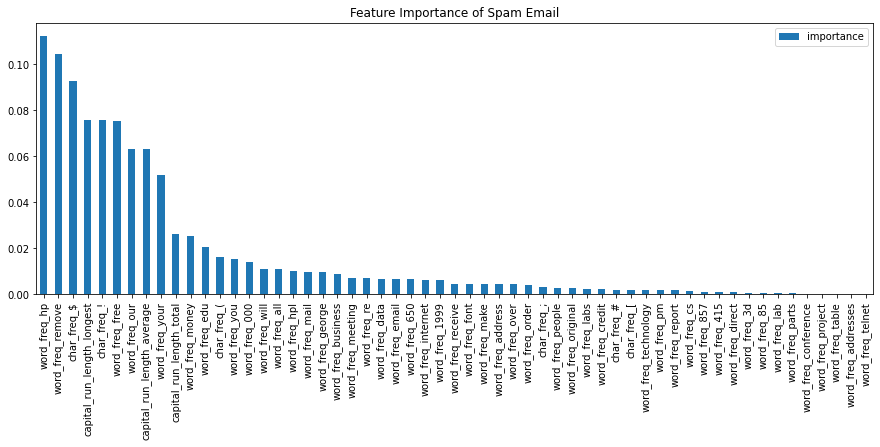

In [10]:
feature_importances.plot(kind = 'bar',figsize=(15,5), title='Feature Importance of Spam Email')

In [11]:
featureThreshold = 0.005

In [12]:
features_to_drop = feature_importances.loc[feature_importances.importance < featureThreshold]

In [13]:
features_to_drop.index

Index(['word_freq_receive', 'word_freq_font', 'word_freq_make',
       'word_freq_address', 'word_freq_over', 'word_freq_order', 'char_freq_;',
       'word_freq_people', 'word_freq_original', 'word_freq_labs',
       'word_freq_credit', 'char_freq_#', 'char_freq_[',
       'word_freq_technology', 'word_freq_pm', 'word_freq_report',
       'word_freq_cs', 'word_freq_857', 'word_freq_415', 'word_freq_direct',
       'word_freq_3d', 'word_freq_85', 'word_freq_lab', 'word_freq_parts',
       'word_freq_conference', 'word_freq_project', 'word_freq_table',
       'word_freq_addresses', 'word_freq_telnet'],
      dtype='object')

In [14]:
reducedTrainingDF = trainingDF.drop(columns = features_to_drop.index)

In [15]:
train_X = reducedTrainingDF.drop(columns = ['class'])
train_y = reducedTrainingDF['class']

In [16]:
testDF = pd.read_csv(r"../Competition/test_data.csv")

In [17]:
reducedTestDF = testDF.drop(columns = features_to_drop.index)

In [18]:
test_X = reducedTestDF.drop(columns = 'class')
test_y = reducedTestDF['class']

In [19]:
##Remove for final
train_X.to_csv(r"../Competition/train_X.csv")
train_y.to_csv(r"../Competition/train_y.csv")

In [20]:
type(train_y)

pandas.core.series.Series

<h3> Data Normalization </h3>

In [21]:
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [22]:
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns


In [23]:
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

In [24]:
#Remove in Final
train_X_scale.to_csv(r"../Competition/train_X_scale.csv")

<h3> Training Model <h3>

In [25]:
clf1 = BernoulliNB()

In [26]:
clf2 = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_features = 7, bootstrap=True, random_state=1984)

In [105]:
clf3 = MLPClassifier(solver = 'lbfgs', activation = 'tanh', max_iter=1500, early_stopping=True, tol =8e-4)

In [106]:
clf4 = SVC(kernel = 'rbf', gamma = 0.3, C=400, probability=True)

In [107]:
clf5 = neighbors.KNeighborsClassifier(n_neighbors=11,weights='uniform',algorithm='auto')

In [108]:
clf5 = BaggingClassifier(clf5, n_estimators=50)

In [109]:
eclf = VotingClassifier(estimators = [('bnb',clf1),('rf',clf2),('mlp',clf3),('svc',clf4),('knn',clf5)], voting = 'soft', weights =[.5,3,1,1,1])

In [110]:
eclf.fit(train_X_scale,train_y)

VotingClassifier(estimators=[('bnb', BernoulliNB()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=7,
                                                     n_estimators=150,
                                                     random_state=1984)),
                             ('mlp',
                              MLPClassifier(activation='tanh',
                                            early_stopping=True, max_iter=1500,
                                            solver='lbfgs', tol=0.0008)),
                             ('svc', SVC(C=400, gamma=0.3, probability=True)),
                             ('knn',
                              BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=11),
                                                n_estimators=50))],
                 voting='soft', weights=[0.5, 3, 1, 1, 1])

In [111]:
pred_y = eclf.predict(test_X_scale)

In [112]:
cm = metrics.confusion_matrix(test_y, pred_y)
print(cm)

[[813  24]
 [ 41 503]]


In [113]:
import matplotlib.pyplot as plt
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Spam','Not Spam']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

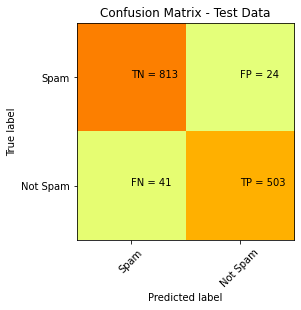

In [103]:
print_cm(cm)

In [114]:
metrics.roc_auc_score(test_y,pred_y)

0.9479792589078643

In [115]:
clf2.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', max_features=7, n_estimators=150,
                       random_state=1984)

In [39]:
pred_y_rf = clf2.predict(test_X)

In [40]:
metrics.roc_auc_score(test_y,pred_y_rf)

0.9498174942019817

In [41]:
clf1.fit(train_X, train_y)

BernoulliNB()

In [42]:
pred_y_bnb = clf1.predict(test_X)

In [43]:
metrics.roc_auc_score(test_y,pred_y_bnb)

0.8861699697800267

In [44]:
clf4.fit(train_X_scale, train_y)

SVC(C=400, gamma=0.3, probability=True)

In [45]:
pred_y_svc = clf4.predict(test_X_scale)

In [46]:
metrics.roc_auc_score(test_y,pred_y_svc)

0.9278970324689015

In [47]:
clf3.fit(train_X_scale, train_y)

MLPClassifier(activation='tanh', early_stopping=True, max_iter=1500,
              solver='lbfgs', tol=0.0008)

In [48]:
pred_y_gnb = clf3.predict(test_X_scale)

In [49]:
metrics.roc_auc_score(test_y,pred_y_gnb)

0.9334589570595263

In [50]:
clf5.fit(train_X_scale, train_y)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=11),
                  n_estimators=50)

In [51]:
pred_y_knn = clf5.predict(test_X_scale)

In [52]:
metrics.roc_auc_score(test_y, pred_y_knn)

0.8798745080469463